In [ ]:
### A predictive model capable of accurately predicting if the home team will win a football match?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [11]:
# import data
football_data = pd.read_csv("final_dataset.csv")
football_data

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [12]:
# selecting all the important statistics.

# FTHG: Full Time Home Team Goals
# FTAG: Full-Time Away Team Goals
# FTR: Full-Time Result - (H=Home Win, D=Draw, A=Away Win)

required_columns = ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]



In [13]:
football_data.isnull().sum()

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

In [14]:
football_data.describe()

,Unnamed: 0,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,3419.500000,1.527485,1.130263,24.416667,24.514327,24.497807,24.347515,1.209014,1.226768,19.500000,...,0.057602,0.014327,0.062865,0.016520,0.051023,0.010234,-0.009690,0.014539,-0.017755,-0.018086
std,1974.682253,1.297913,1.124566,17.178524,17.136894,16.401571,16.341557,0.530186,0.523176,10.966658,...,0.233007,0.118846,0.242739,0.127475,0.220062,0.100651,0.693593,0.692937,0.668523,0.408488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.333333,-2.363636,-2.250000
25%,1709.750000,1.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.888889,0.906250,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.464286,-0.451613,-0.176471
50%,3419.500000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.172414,1.192308,19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.076923,-0.050000,0.000000,0.000000
75%,5129.250000,2.000000,2.000000,35.000000,35.000000,36.000000,36.000000,1.555556,1.562500,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.421053,0.428571,0.153846
max,6839.000000,9.000000,7.000000,102.000000,105.000000,85.000000,82.000000,2.736842,2.761905,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.500000,2.285714,2.250000


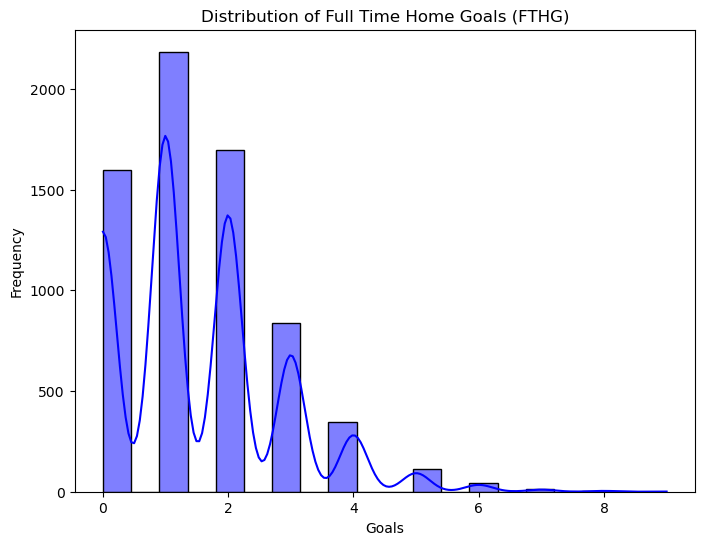

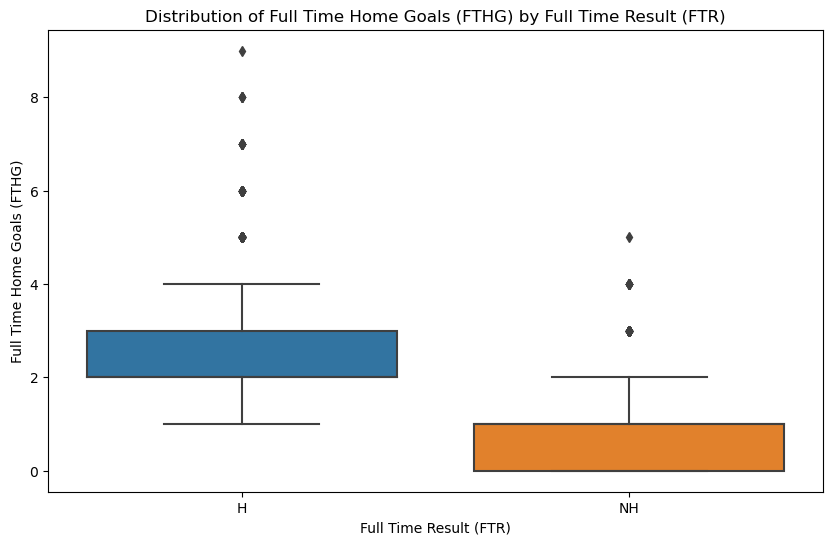

/Users/mohameduzair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


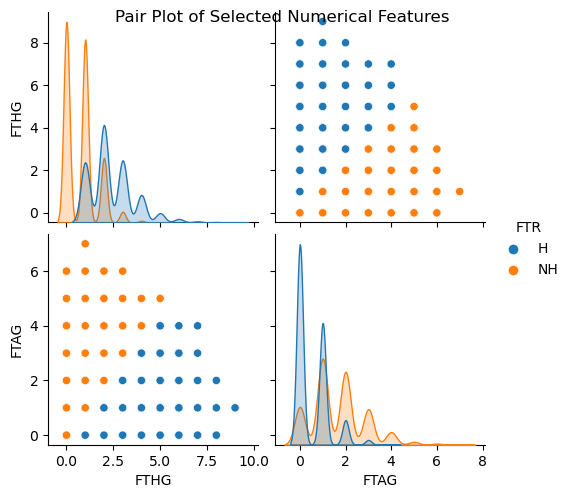

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Full Time Home Goals (FTHG)
plt.figure(figsize=(8, 6))
sns.histplot(football_data['FTHG'], bins=20, kde=True, color='blue')
plt.title('Distribution of Full Time Home Goals (FTHG)')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# Box plot of Full Time Home Goals (FTHG) by Full Time Result (FTR)
plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR', y='FTHG', data=football_data)
plt.title('Distribution of Full Time Home Goals (FTHG) by Full Time Result (FTR)')
plt.xlabel('Full Time Result (FTR)')
plt.ylabel('Full Time Home Goals (FTHG)')
plt.show()

# Pair plot of selected numerical features
selected_features = ['FTHG', 'FTAG', 'FTR']
sns.pairplot(football_data[selected_features], hue='FTR', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()


In [25]:
# Feature Engineering
# 1. Extract features from Date: These features could capture potential patterns related to the timing of matches. 
football_data['Date'] = pd.to_datetime(football_data['Date'])
football_data['Month'] = football_data['Date'].dt.month
football_data['DayOfWeek'] = football_data['Date'].dt.dayofweek
football_data['Season'] = np.where(football_data['Date'].dt.month.isin([12, 1, 2]), 'Winter',
                                  np.where(football_data['Date'].dt.month.isin([3, 4, 5]), 'Spring',
                                           np.where(football_data['Date'].dt.month.isin([6, 7, 8]), 'Summer', 'Autumn')))

# Encode Categorical Variables
# convert catagorical variables into numarical variables
encoded_data = pd.get_dummies(football_data, columns=['HomeTeam', 'AwayTeam', 'Season'], drop_first=True)


# Create an aditional feature to calculate goal differences...
encoded_data['GoalDifference'] = encoded_data['FTHG'] - encoded_data['FTAG']
encoded_data['HomeAvgGoals'] = encoded_data.groupby('HomeTeam')['FTHG'].transform(lambda x: x.expanding().mean())
encoded_data['AwayAvgGoals'] = encoded_data.groupby('AwayTeam')['FTAG'].transform(lambda x: x.expanding().mean())


print(encoded_data.head())

KeyError: 'HomeTeam'

In [26]:
print(football_data.columns)

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'Month', 'DayOfWeek', 'Season'],
      dtype='object')
